# Here, we are creating ANN for classification of images on real dataset (Fashion_MNIST)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch.optim as optim
import torch
from torch.utils.data import DataLoader, Dataset


In [2]:
# Set random seed for generate randomize data
torch.manual_seed(42)

In [3]:
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')
original_train_data = pd.read_csv('fashion-mnist_train.csv')


In [4]:
# Merge along rows (stack them)
fashion_all = pd.concat([train, test], axis=0, ignore_index=True)


In [5]:
train.shape

(60000, 785)

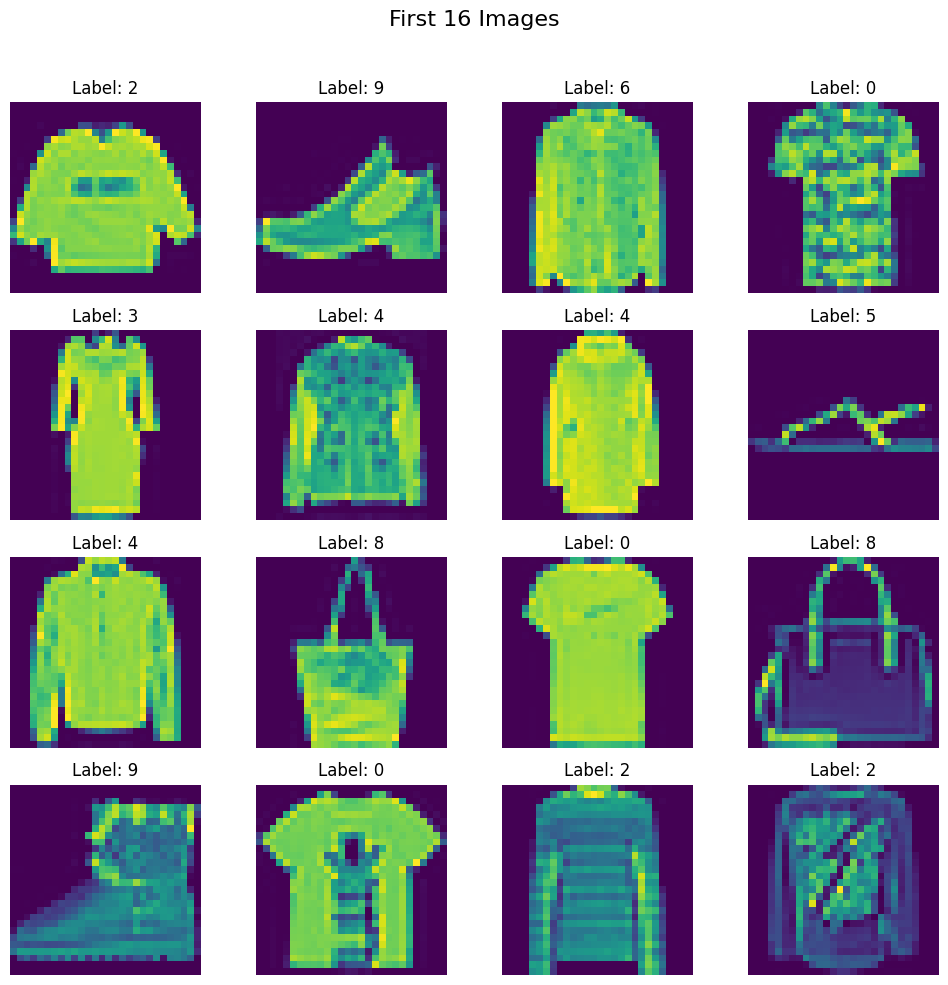

In [6]:
import matplotlib.pyplot as plt
# Create a 4x4 grid of images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("First 16 Images", fontsize=16)

# Plot the first 16 images from the dataset
for i, ax in enumerate(axes.flat):
    img = fashion_all.iloc[i, 1:].values.reshape(28, 28)  # Reshape to 28x28
    ax.imshow(img)  # Display in grayscale
    ax.axis('off')  # Remove axis for a cleaner look
    ax.set_title(f"Label: {train.iloc[i, 0]}")  # Show the label

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()


# Train-Test Split

In [7]:
# split data and label in x and y

X = train.iloc[:, 1:].values
y = train.iloc[:, 0].values

# NOTE: when you run this cell, then dataframe will convert to numpy arrays with the use of .values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
len(X_train)

48000

# Scale the data to bring data to range from 0 to 1 instead of 0 to 255

In [10]:
# scaling the feautures
X_train = X_train/255.0
X_test = X_test/255.0

In [11]:
X_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00392157, 0.        ,
        0.        ]])

# Now, create Dataset, and DataLoader for create batches

In [12]:
# create CustomDataset Class
class CustomDataset(Dataset):

  def __init__(self, features, labels):

    self.features = torch.tensor(features, dtype=torch.float32)
    self.labels = torch.tensor(labels, dtype=torch.long)

  def __len__(self):

    return len(self.features)

  def __getitem__(self, index):

    return self.features[index], self.labels[index]



In [13]:
# create train_dataset object
train_dataset = CustomDataset(X_train, y_train)

In [14]:
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2275,
         0.5333, 0.0000, 0.0

In [15]:
# create the test_dataset object
test_dataset = CustomDataset(X_test, y_test)

In [16]:
# create train and test loader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Create a simple neural network.
# You can modify the number of layers, neurons, and other hyperparameters
# to observe their effect on loss and accuracy.
# Feel free to experiment with different configurations to fine-tune performance.


In [17]:
class Mymodel(nn.Module):

    def __init__(self, features):
        super().__init__()


        self.model = nn.Sequential(
            nn.Linear(features, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10),
            nn.Softmax()
        )

    def forward(self, x):
        return self.model(x)


In [18]:
# set learning rate and epochs
epochs = 100
learning_rate = 0.1

In [19]:
# instatiate the model
model = Mymodel(X_train.shape[1])

# loss function
criterion = nn.CrossEntropyLoss()

# optimizer
optimizer = optim.SGD(model.parameters(), lr= learning_rate)

In [20]:
len(train_loader)

1500

In [21]:
# training loop

for epoch in range(epochs):

  total_epoch_loss = 0

  for batch_features, batch_labels in train_loader:

    # forward pass
    outputs = model(batch_features)

    # calculate loss
    loss = criterion(outputs, batch_labels)

    # back pass
    optimizer.zero_grad()
    loss.backward()

    # update grads
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()

  avg_loss = total_epoch_loss/len(train_loader)
  print(f'Epoch: {epoch + 1} , Loss: {avg_loss} /n')


/Users/apple/PycharmProjects/pytorch/.venv/lib/python3.10/site-packages/torch/nn/modules/module.py:1511: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Epoch: 1 , Loss: 2.019218998750051 /n
Epoch: 2 , Loss: 1.7566417314211527 /n
Epoch: 3 , Loss: 1.7353262275060017 /n
Epoch: 4 , Loss: 1.72678222544988 /n
Epoch: 5 , Loss: 1.7199570478598276 /n
Epoch: 6 , Loss: 1.7162702261606853 /n
Epoch: 7 , Loss: 1.713553200006485 /n
Epoch: 8 , Loss: 1.7117818732261658 /n
Epoch: 9 , Loss: 1.70934818983078 /n
Epoch: 10 , Loss: 1.706811271429062 /n
Epoch: 11 , Loss: 1.7058822853565216 /n
Epoch: 12 , Loss: 1.7043681530952453 /n
Epoch: 13 , Loss: 1.701827003955841 /n
Epoch: 14 , Loss: 1.7020787116686502 /n
Epoch: 15 , Loss: 1.7011979327996571 /n
Epoch: 16 , Loss: 1.699345619916916 /n
Epoch: 17 , Loss: 1.6986246931552886 /n
Epoch: 18 , Loss: 1.697294774055481 /n
Epoch: 19 , Loss: 1.6959715263843536 /n
Epoch: 20 , Loss: 1.6947204427719116 /n
Epoch: 21 , Loss: 1.693763175566991 /n
Epoch: 22 , Loss: 1.6927453124523162 /n
Epoch: 23 , Loss: 1.6927164190610249 /n
Epoch: 24 , Loss: 1.6911064222653707 /n
Epoch: 25 , Loss: 1.6803588933149973 /n
Epoch: 26 , Loss: 1.

In [22]:
# set model to eval mode
model.eval()

Mymodel(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=10, bias=True)
    (7): Softmax(dim=None)
  )
)

# Evaluation of model

In [23]:
# evaluation code
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in test_loader:

    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)


0.88325


In [24]:
from torchinfo import summary

summary(model, input_size=X_train.shape)

Layer (type:depth-idx)                   Output Shape              Param #
Mymodel                                  [48000, 10]               --
├─Sequential: 1-1                        [48000, 10]               --
│    └─Linear: 2-1                       [48000, 256]              200,960
│    └─ReLU: 2-2                         [48000, 256]              --
│    └─Linear: 2-3                       [48000, 128]              32,896
│    └─ReLU: 2-4                         [48000, 128]              --
│    └─Linear: 2-5                       [48000, 64]               8,256
│    └─ReLU: 2-6                         [48000, 64]               --
│    └─Linear: 2-7                       [48000, 10]               650
│    └─Softmax: 2-8                      [48000, 10]               --
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
Total mult-adds (G): 11.65
Input size (MB): 150.53
Forward/backward pass size (MB): 175.87
Params size (MB): 0.97
Estimated Total Size (MB):

In [25]:
for name, param in model.named_parameters():
    print(name, param.shape)
    print(param)  # This prints the actual tensor values


model.0.weight torch.Size([256, 784])
Parameter containing:
tensor([[ 0.0279,  0.0302, -0.0084,  ..., -0.0085,  0.0096,  0.0137],
        [-0.0189, -0.0355,  0.0182,  ...,  0.0278,  0.0035,  0.0113],
        [-0.0015,  0.0016,  0.0054,  ..., -0.0480, -0.0279,  0.0060],
        ...,
        [ 0.0308,  0.0202,  0.0210,  ...,  0.0248,  0.0304,  0.0156],
        [-0.0359,  0.0328, -0.0234,  ...,  0.0307, -0.0335,  0.0012],
        [-0.0067, -0.0318,  0.0256,  ..., -0.0557, -0.0223, -0.0285]],
       requires_grad=True)
model.0.bias torch.Size([256])
Parameter containing:
tensor([ 1.2847e-01, -5.6984e-01,  7.4365e-02,  4.9239e-02, -5.1994e-01,
        -5.2553e-01, -1.5102e-01,  2.5841e-02, -1.6268e-01,  8.3527e-02,
         2.5476e-01, -2.0570e-02, -3.3749e-01,  6.0175e-02, -1.7653e-01,
         1.5207e-02,  1.0240e-02,  3.7150e-01,  2.9407e-01,  7.7755e-02,
         6.7998e-02,  2.2546e-01,  3.2856e-02, -3.6765e-02,  6.3305e-03,
         3.0800e-02,  1.4062e-01,  3.4904e-02,  3.2216e-01, -

In [31]:
# evaluation code for train_loader too.
# The purpose of doing this is to check whether the model is overfitting or underfitting i.e best accuracy on train but poor accuracy on test data.
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in train_loader:

    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)


0.9133541666666667
